In [56]:
# import 
import dicom
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from scipy.misc import bytescale
from skimage import measure, feature
import math

In [53]:
def resize_from_path(source, IMAGE_SIZE=227):
    ds = dicom.read_file(source)
    pixel_array = ds.pixel_array
    im = cv2.resize(pixel_array, (IMAGE_SIZE, IMAGE_SIZE))
    im = bytescale(im)
    return im*0.00390625

def resize_from_ds(ds, IMAGE_SIZE=227):
    pixel_array = ds.pixel_array
    im = cv2.resize(pixel_array, (IMAGE_SIZE, IMAGE_SIZE))
    im = bytescale(im)
    return im*0.00390625

def resize_from_array(pixel_array, IMAGE_SIZE=227):
    im = cv2.resize(pixel_array, (IMAGE_SIZE, IMAGE_SIZE))
    im = bytescale(im)
    return im*0.00390625

In [64]:
# Load the scans in given folder path
# threshold: HU threshold
def load_scan(path, threshold=400):
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    # Set outside-of-scan pixels to 0
    # The intercept is usually -1024, so air is approximately 0
    # Convert to Hounsfield units (HU)
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    all_scans = []
    for each_slice in slices:
        intercept = each_slice.RescaleIntercept
        slope = each_slice.RescaleSlope
        image = each_slice.pixel_array
        if slope != 1:
            image[(slope * image + intercept)<threshold] = 0
        all_scans.append(image)
    return np.array(all_scans)

In [49]:
def plot_ct_scan(scan):
    '''
            plot a few more images of the slices
    :param scan:
    :return:
    '''
#     f, plots = plt.subplots(int(scan.shape[0] / 20) + 1, 4, figsize=(50, 50))
#     for i in range(0, scan.shape[0]):
#         plots[int(i / 20), int((i % 20) / 5)].axis('off')
#         plots[int(i / 20), int((i % 20) / 5)].imshow(scan[i], cmap=plt.cm.bone)
#     plt.show()
#     f, plots = plt.subplots(int(scan.shape[0] / 4) + 1, 4, figsize=(50, 50))
    f, plots = plt.subplots(int(scan.shape[0] / 4), 4, figsize=(100, 100))
    f.tight_layout()
    for i in range(0, scan.shape[0]):
        plots[int(i / 4), int((i % 4))].axis('off')
        plots[int(i / 4), int((i % 4))].imshow(cv2.resize(scan[i], (64, 64)), cmap=plt.cm.bone)
    plt.show()

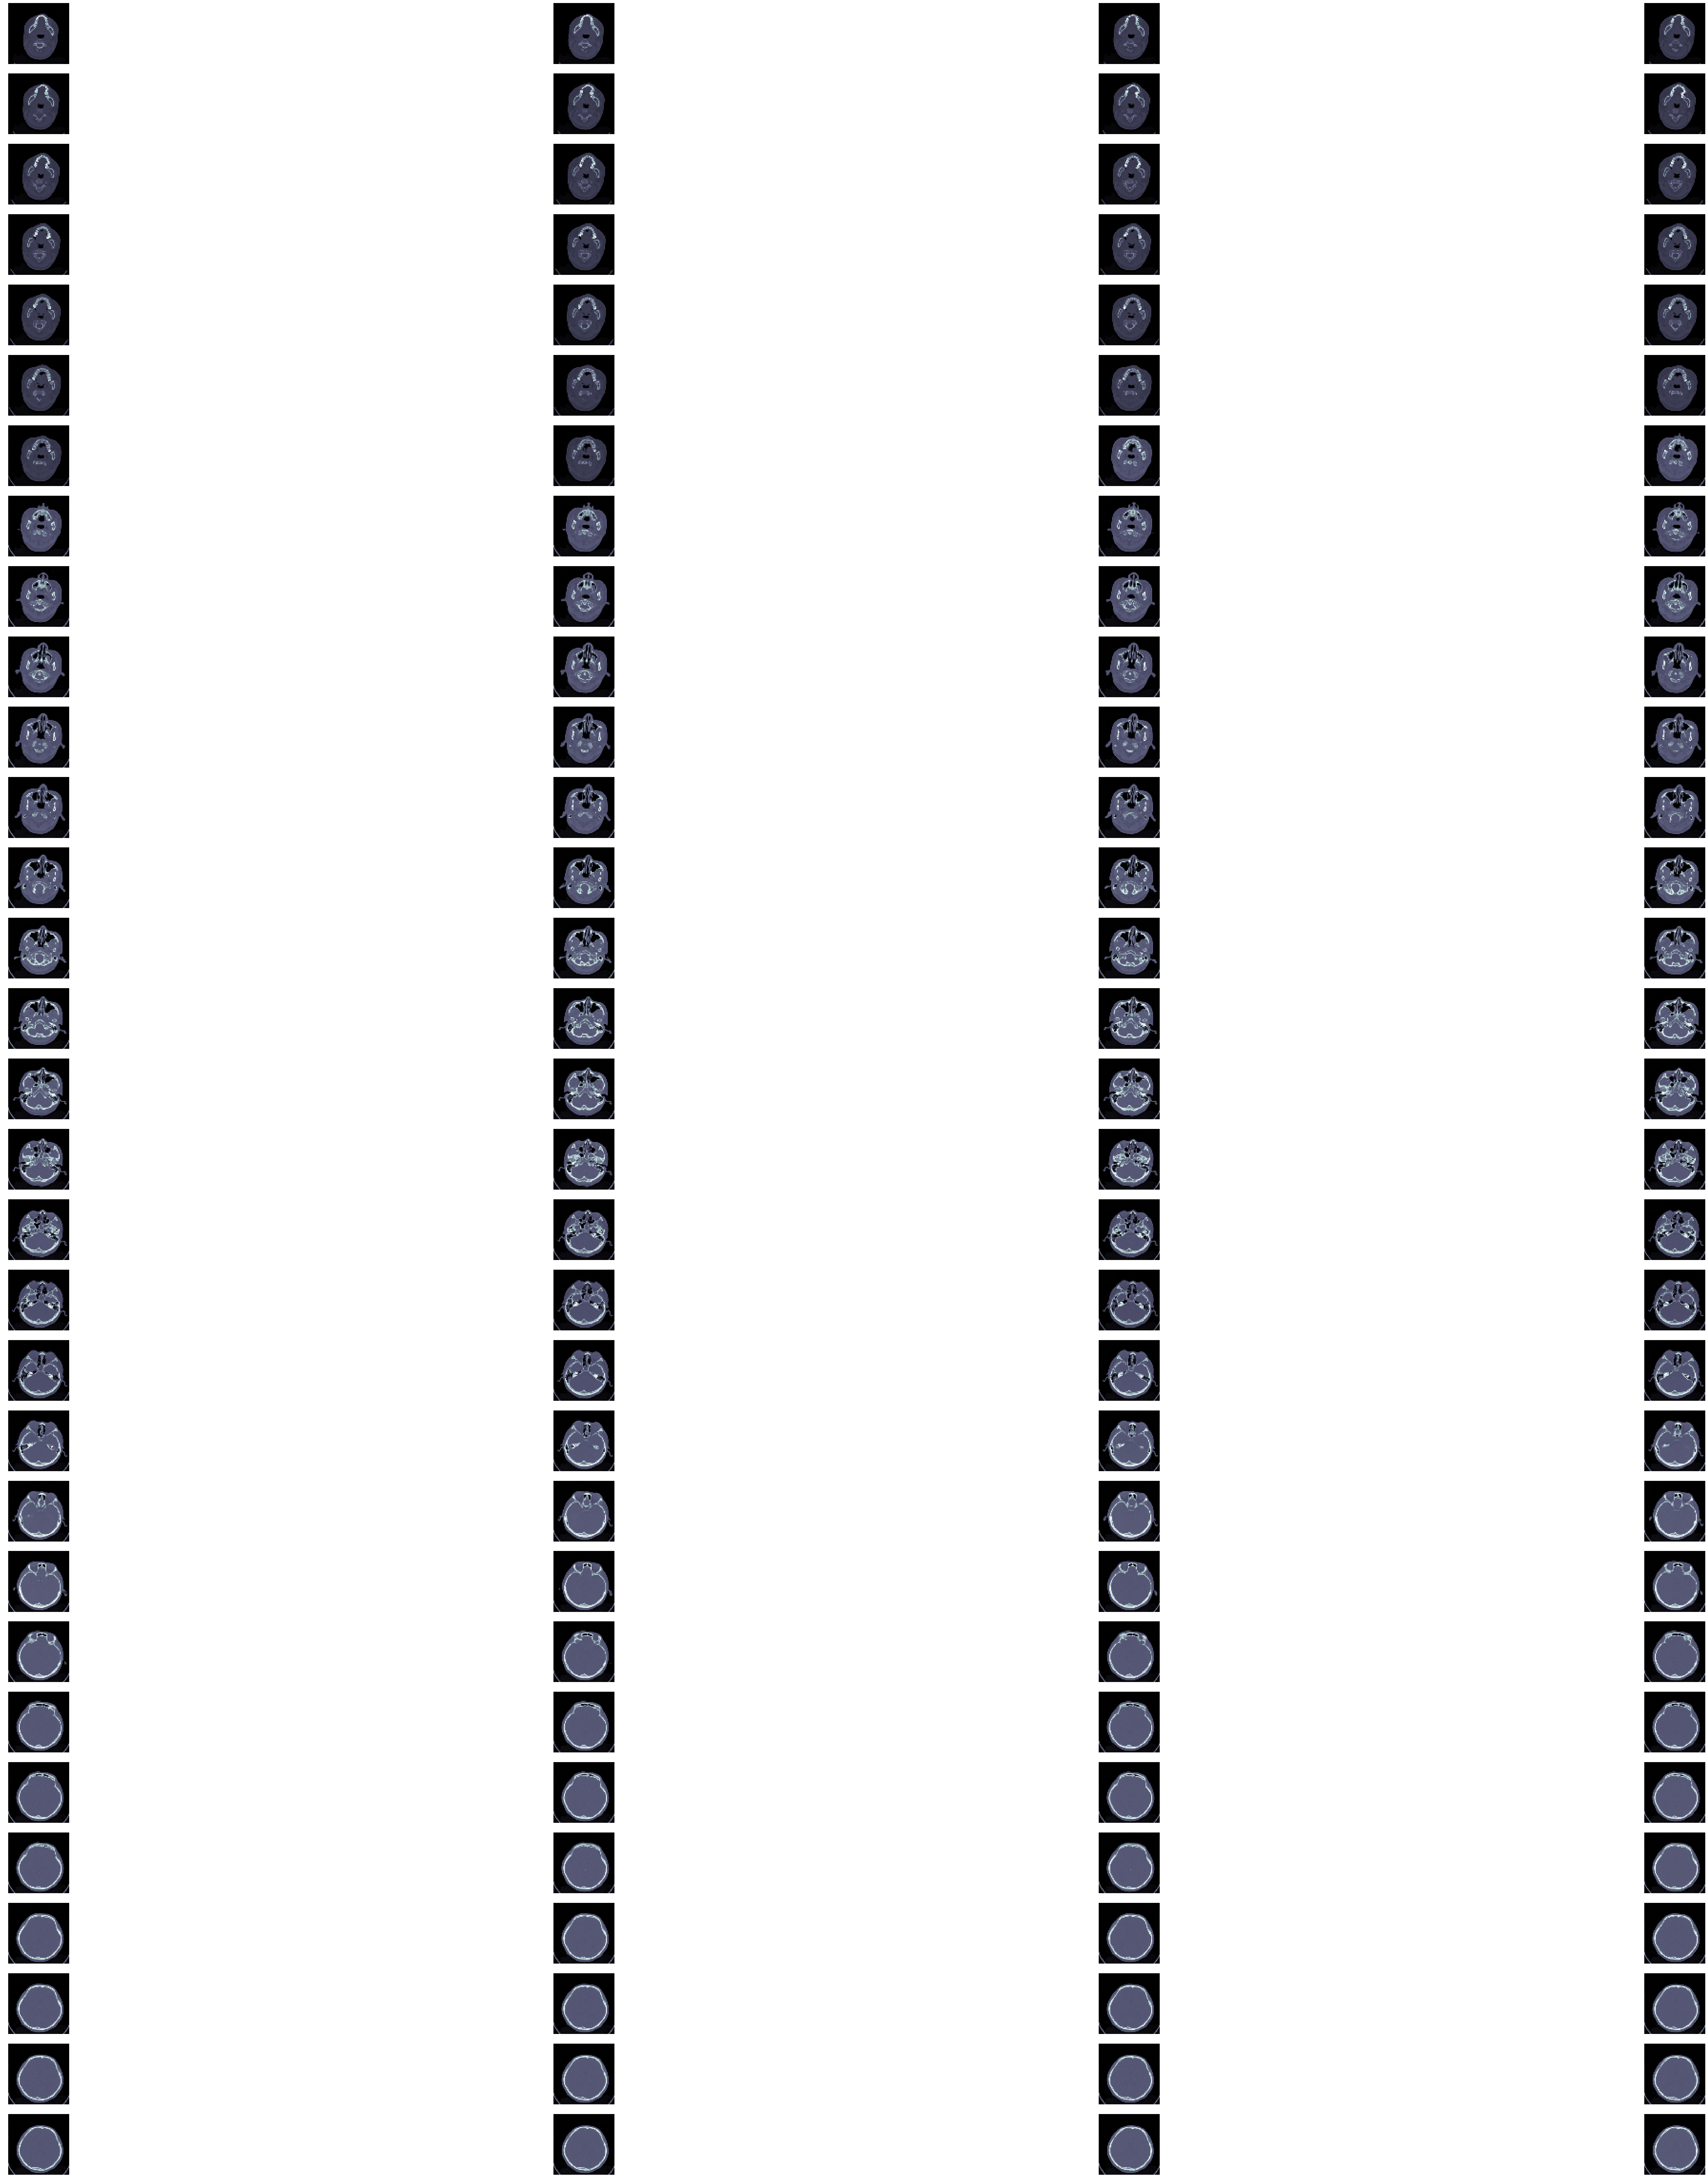

[24 20 18 ..., 22 19 16]


In [67]:
scans = load_scan("/home/hzzone/classifited/train/0000279404/20150528")
plot_ct_scan(scans)
print scans[0].flatten()

In [62]:
#n-sized chunks from list l
def chunks(l, n):
    count=0
    for i in range(0, len(l), n):
        if(count < n):
            yield l[i:i + n]
            count=count+1

def process_data(slices, IMAGESIZE=64, HM_SLICES=64):
    slices = [resize_from_array(each_slice, IMAGE_SIZE=IMAGESIZE) for each_slice in slices]
    chunk_sizes = int(math.floor(len(slices) / HM_SLICES))
    new_slices = []
    for slice_chunk in chunks(slices, chunk_sizes):
#         slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)
    return np.array(new_slices)

In [63]:
process_data(load_scan("/home/hzzone/classifited/train/0000279404/20150528"))

array([[[[ 0.00390625,  0.0078125 ,  0.00390625, ...,  0.00390625,
           0.00390625,  0.00390625],
         [ 0.00390625,  0.00390625,  0.0078125 , ...,  0.00390625,
           0.00390625,  0.0078125 ],
         [ 0.0078125 ,  0.00390625,  0.00390625, ...,  0.00390625,
           0.0078125 ,  0.00390625],
         ..., 
         [ 0.00390625,  0.00390625,  0.00390625, ...,  0.0078125 ,
           0.00390625,  0.00390625],
         [ 0.00390625,  0.00390625,  0.00390625, ...,  0.0078125 ,
           0.015625  ,  0.01953125],
         [ 0.00390625,  0.00390625,  0.0078125 , ...,  0.00390625,
           0.00390625,  0.00390625]]]])